## HW2

## Data and Library Part

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
match_data = pd.read_excel("match_data.xlsx")

In [38]:
match_data.head()

,fixture_id,halftime,current_time,half_start_datetime,match_start_datetime,minute,second,latest_bookmaker_update,suspended,stopped,...,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home,current_state,final_score,result
0,19172016.0,1st-half,2024-08-09 18:11:36,2024-08-09 18:01:37,2024-08-09 18:01:37,9,59,2024-08-09 18:11:28,False,False,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,X,2-1,1
1,19172016.0,1st-half,2024-08-09 18:27:30,2024-08-09 18:01:37,2024-08-09 18:01:37,25,53,2024-08-09 18:27:24,False,False,...,11.0,1.0,12.0,0.0,0.0,0.0,0.0,X,2-1,1
2,19172016.0,1st-half,2024-08-09 18:28:25,2024-08-09 18:01:37,2024-08-09 18:01:37,26,48,2024-08-09 18:28:20,False,False,...,11.0,1.0,13.0,0.0,0.0,0.0,0.0,X,2-1,1
3,19172016.0,1st-half,2024-08-09 18:29:32,2024-08-09 18:01:37,2024-08-09 18:01:37,27,55,2024-08-09 18:29:28,False,False,...,11.0,1.0,13.0,0.0,0.0,0.0,0.0,X,2-1,1
4,19172016.0,1st-half,2024-08-09 18:30:37,2024-08-09 18:01:37,2024-08-09 18:01:37,29,0,2024-08-09 18:30:32,True,False,...,11.0,1.0,14.0,0.0,0.0,0.0,0.0,X,2-1,1


Suspended and stopped data are eliminated from data and some goal cancels and previous data of these cancels are eliminated because these affect results.

In [39]:
match_data = match_data[~(match_data['suspended'] | match_data['stopped'])]
match_data.reset_index(inplace=True, drop= True)
indices = match_data.index[(match_data['Score Change - away'] == -1) | (match_data['Score Change - home'] == -1)]
rows_to_drop = set(indices) | set(indices - 1)
rows_to_drop = [i for i in rows_to_drop if i >= 0]
match_data = match_data.drop(index=rows_to_drop)
match_data.reset_index(inplace=True, drop= True)
match_data

,fixture_id,halftime,current_time,half_start_datetime,match_start_datetime,minute,second,latest_bookmaker_update,suspended,stopped,...,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home,current_state,final_score,result
0,19172016.0,1st-half,2024-08-09 18:11:36,2024-08-09 18:01:37,2024-08-09 18:01:37,9,59,2024-08-09 18:11:28,False,False,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,X,2-1,1
1,19172016.0,1st-half,2024-08-09 18:27:30,2024-08-09 18:01:37,2024-08-09 18:01:37,25,53,2024-08-09 18:27:24,False,False,...,11.0,1.0,12.0,0.0,0.0,0.0,0.0,X,2-1,1
2,19172016.0,1st-half,2024-08-09 18:28:25,2024-08-09 18:01:37,2024-08-09 18:01:37,26,48,2024-08-09 18:28:20,False,False,...,11.0,1.0,13.0,0.0,0.0,0.0,0.0,X,2-1,1
3,19172016.0,1st-half,2024-08-09 18:29:32,2024-08-09 18:01:37,2024-08-09 18:01:37,27,55,2024-08-09 18:29:28,False,False,...,11.0,1.0,13.0,0.0,0.0,0.0,0.0,X,2-1,1
4,19172016.0,1st-half,2024-08-09 18:34:18,2024-08-09 18:01:37,2024-08-09 18:01:37,32,41,2024-08-09 18:34:12,False,False,...,11.0,1.0,14.0,0.0,0.0,0.0,0.0,X,2-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55838,19135376.0,2nd-half,2024-11-10 21:51:41,2024-11-10 21:06:59,2024-11-10 20:02:05,44,42,2024-11-10 21:51:37,False,False,...,0.0,19.0,10.0,1.0,3.0,0.0,0.0,1,1-0,1
55839,19135376.0,2nd-half,2024-11-10 21:52:41,2024-11-10 21:06:59,2024-11-10 20:02:05,45,42,2024-11-10 21:52:37,False,False,...,0.0,19.0,10.0,1.0,3.0,0.0,0.0,1,1-0,1
55840,19135376.0,2nd-half,2024-11-10 21:53:41,2024-11-10 21:06:59,2024-11-10 20:02:05,46,42,2024-11-10 21:53:35,False,False,...,0.0,19.0,10.0,1.0,3.0,0.0,0.0,1,1-0,1
55841,19135376.0,2nd-half,2024-11-10 21:54:41,2024-11-10 21:06:59,2024-11-10 20:02:05,47,42,2024-11-10 21:54:36,False,False,...,0.0,19.0,10.0,1.0,3.0,0.0,0.0,1,1-0,1


If there are two data for the same minute and second, the last one is dropped.

In [40]:
match_data = match_data.drop_duplicates(subset=['fixture_id', 'minute', 'second'], keep='last')

Checked whether any missing value in results and odd columns

In [41]:
match_data.rename(columns={1:'1', 2:'2'}, inplace=True)
task1_df = match_data[['fixture_id','halftime', '1','2','X','result']]
task1_df_na = task1_df.dropna()
if len(task1_df_na) == len(task1_df):
    print('There is no missing value in bet columns')

There is no missing value in bet columns


C:\Users\Yusuf\AppData\Local\Temp\ipykernel_2472\535838494.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## TASK-1

### Formula for normalization of probabilities
![alt text](image.png)

### Comparing Historical Results and Assigned Probabilities by Bookmaker of Draw Matches 

In [42]:
def task1(data):    
    data = data[['fixture_id','halftime', 'minute', 'second','1','2','X','result']]
    data = data.copy()
    data['P_home'] = 1 / data['1']
    data['P_draw'] = 1 / data['X']
    data['P_away'] = 1 / data['2']

    data['P_sum'] = data['P_home'] + data['P_draw'] + data['P_away']
    data['normalized_P_home'] = data['P_home'] / data['P_sum']
    data['normalized_P_draw'] = data['P_draw'] / data['P_sum']
    data['normalized_P_away'] = data['P_away'] / data['P_sum']

    data['normalized_P_home-normalized_P_away'] = data['normalized_P_home'] - data['normalized_P_away']
    return data

task1_df = task1(match_data)
task1_df

,fixture_id,halftime,minute,second,1,2,X,result,P_home,P_draw,P_away,P_sum,normalized_P_home,normalized_P_draw,normalized_P_away,normalized_P_home-normalized_P_away
0,19172016.0,1st-half,9,59,1.22,10.0,6.5,1,0.819672,0.153846,0.100000,1.073518,0.763538,0.143310,0.093152,0.670386
1,19172016.0,1st-half,25,53,1.20,13.0,6.0,1,0.833333,0.166667,0.076923,1.076923,0.773810,0.154762,0.071429,0.702381
2,19172016.0,1st-half,26,48,1.20,13.0,6.0,1,0.833333,0.166667,0.076923,1.076923,0.773810,0.154762,0.071429,0.702381
3,19172016.0,1st-half,27,55,1.20,13.0,6.0,1,0.833333,0.166667,0.076923,1.076923,0.773810,0.154762,0.071429,0.702381
4,19172016.0,1st-half,32,41,1.20,15.0,6.0,1,0.833333,0.166667,0.066667,1.066667,0.781250,0.156250,0.062500,0.718750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55838,19135376.0,2nd-half,44,42,1.08,126.0,7.5,1,0.925926,0.133333,0.007937,1.067196,0.867625,0.124938,0.007437,0.860188
55839,19135376.0,2nd-half,45,42,1.05,251.0,11.0,1,0.952381,0.090909,0.003984,1.047274,0.909390,0.086805,0.003804,0.905586
55840,19135376.0,2nd-half,46,42,1.05,201.0,11.0,1,0.952381,0.090909,0.004975,1.048265,0.908531,0.086723,0.004746,0.903785
55841,19135376.0,2nd-half,47,42,1.04,351.0,13.0,1,0.961538,0.076923,0.002849,1.041311,0.923393,0.073871,0.002736,0.920657


In this part the difference between probability of home win and probability of away win is obtained, then the probalities divided to bins with 0.1 difference. The mean of draw probabilities assigned by bookmaker in these bins are obtained and compared to actual ratio of the match is resulted with draw. 

In [43]:
def bins_function(data):
    bins_and_probs_first_half = {'bin_average': [],
            'avrg_pr_draw_bm': [],
            'actual_draw_pr': []
            }

    bins_and_probs_second_half = {'bin_average': [],
            'avrg_pr_draw_bm': [],
            'actual_draw_pr': []
            }

    bins = np.linspace(-1, 1, 21)

    for i in range(len(bins[:-1])):
        lower_bound = bins[i]
        upper_bound = bins[i+1]
        bin_average = (lower_bound+upper_bound)/2

        #first_half_data
        filtered_df_for_first_half = data[(data['normalized_P_home-normalized_P_away'] >= lower_bound) & (data['normalized_P_home-normalized_P_away'] < upper_bound) & (data['halftime']=='1st-half')]
        
        count_result_draw = (filtered_df_for_first_half['result'] == 'X').sum()
        total_rows = len(filtered_df_for_first_half)
        average_bookmaker_prob_draw = filtered_df_for_first_half['normalized_P_draw'].mean()
        actual_draw_ratio = count_result_draw / total_rows
        
        bins_and_probs_first_half['bin_average'].append(bin_average)
        bins_and_probs_first_half['actual_draw_pr'].append(actual_draw_ratio)
        bins_and_probs_first_half['avrg_pr_draw_bm'].append(average_bookmaker_prob_draw)

        #second_half_data
        filtered_df_for_second_half = data[(data['normalized_P_home-normalized_P_away'] >= lower_bound) & (data['normalized_P_home-normalized_P_away'] < upper_bound) & (data['halftime']=='2nd-half')]
        
        count_result_draw_2 = (filtered_df_for_second_half['result'] == 'X').sum()
        total_rows_2 = len(filtered_df_for_second_half)
        average_bookmaker_prob_draw_2 = filtered_df_for_second_half['normalized_P_draw'].mean()
        actual_draw_ratio_2 = count_result_draw_2 / total_rows_2

        bins_and_probs_second_half['bin_average'].append(bin_average)
        bins_and_probs_second_half['actual_draw_pr'].append(actual_draw_ratio_2)
        bins_and_probs_second_half['avrg_pr_draw_bm'].append(average_bookmaker_prob_draw_2)
            
    first_half = pd.DataFrame(bins_and_probs_first_half)
    second_half = pd.DataFrame(bins_and_probs_second_half)

    return first_half, second_half
plotdf1, plotdf2 = bins_function(task1_df)

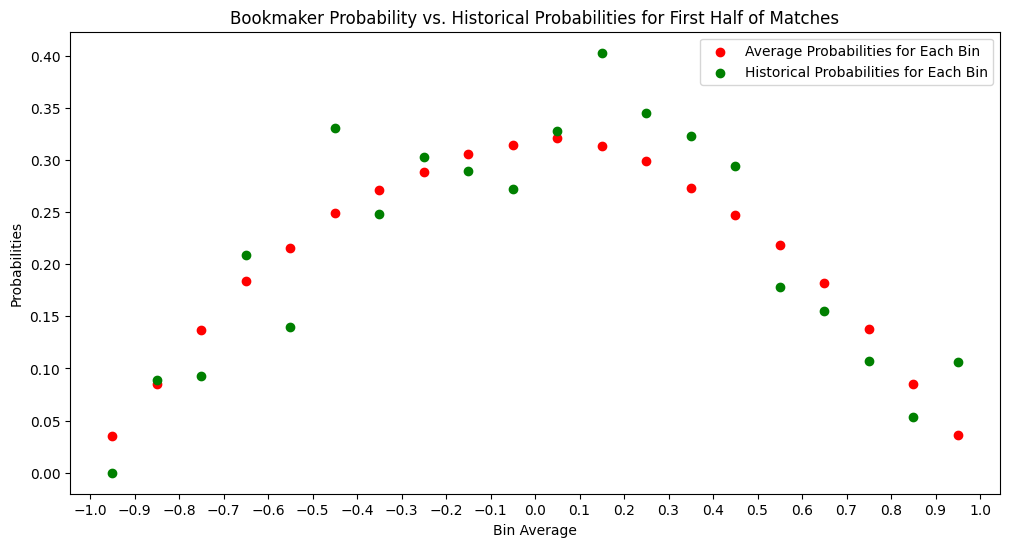

In [44]:

plt.figure(figsize=(12, 6))

# Scatter plot for "Average Probabilities for Each Bin"
plt.scatter(plotdf1['bin_average'], plotdf1['avrg_pr_draw_bm'], color='red', label="Average Probabilities for Each Bin")

# Scatter plot for "Historical Probabilities for Each Bin"
plt.scatter(plotdf1['bin_average'], plotdf1['actual_draw_pr'], color='green', label="Historical Probabilities for Each Bin")

# X-axis ticks
plt.xticks(ticks=np.linspace(-1, 1, 21))

# Labels and title
plt.xlabel('Bin Average')
plt.ylabel('Probabilities')
plt.title(f'Bookmaker Probability vs. Historical Probabilities for First Half of Matches')

# Add legend
plt.legend()

# Show the plot
plt.show()



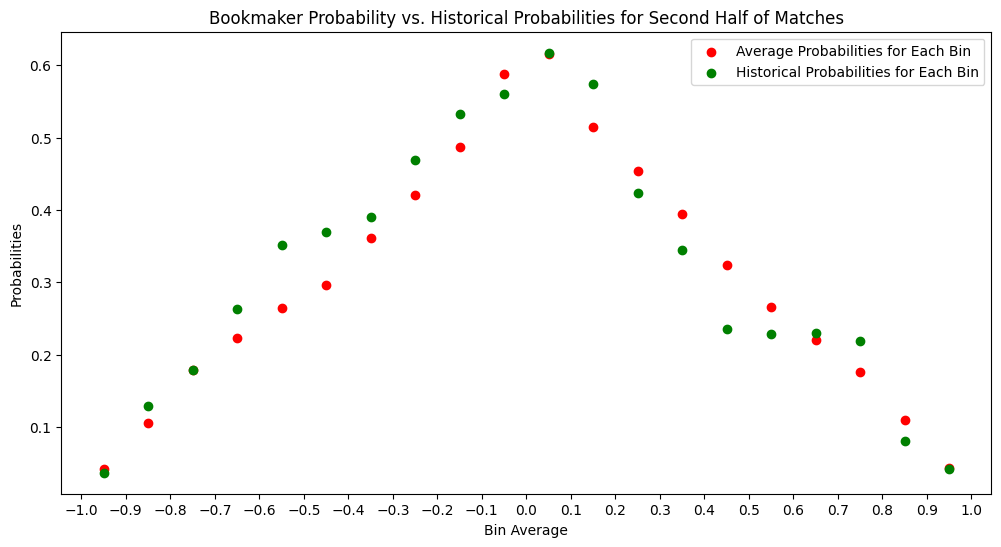

In [45]:

plt.figure(figsize=(12, 6))

# Scatter plot for "Average Probabilities for Each Bin"
plt.scatter(plotdf2['bin_average'], plotdf2['avrg_pr_draw_bm'], color='red', label="Average Probabilities for Each Bin")

# Scatter plot for "Historical Probabilities for Each Bin"
plt.scatter(plotdf2['bin_average'], plotdf2['actual_draw_pr'], color='green', label="Historical Probabilities for Each Bin")

# X-axis ticks
plt.xticks(ticks=np.linspace(-1, 1, 21))

# Labels and title
plt.xlabel('Bin Average')
plt.ylabel('Probabilities')
plt.title(f'Bookmaker Probability vs. Historical Probabilities for Second Half of Matches')

# Add legend
plt.legend()

# Show the plot
plt.show()

There is a bias between historical results and results proposed by the bookmaker. If the home team's chance of winning in the first half is 0.5 more than the other team's, playing for a draw will be profitable in the long run. Other than that, if the away team's chance of winning in the second half is higher than the other team's, playing for a draw will be profitable in the long run.

## TASK-2

Any match that red card is seen is removed because red card changes all dynamics of matches no matter what minute it comes out. There are some cancel red cards in data; therefore, some conditions is applied about these cancels.

In [46]:
def check_group(group):
    if (group['Redcards - home'] == 0).all() and (group['Redcards - away'] == 0).all():
        return True
    
    red_card_seen = group['Redcards - home'].eq(1).cumsum()
    after_first_red_card = group.loc[red_card_seen > 0, 'Redcards - home']

    red_card_seen_away = group['Redcards - away'].eq(1).cumsum()
    after_first_red_card_away = group.loc[red_card_seen_away > 0, 'Redcards - away']
    
    if (after_first_red_card == 0).any() or (after_first_red_card_away == 0).any():
        return True
    
    return False

filtered_match_data = match_data.groupby('fixture_id').filter(check_group)

After data elimination, task 1 is applied again and compared to the analysis before data elimination.

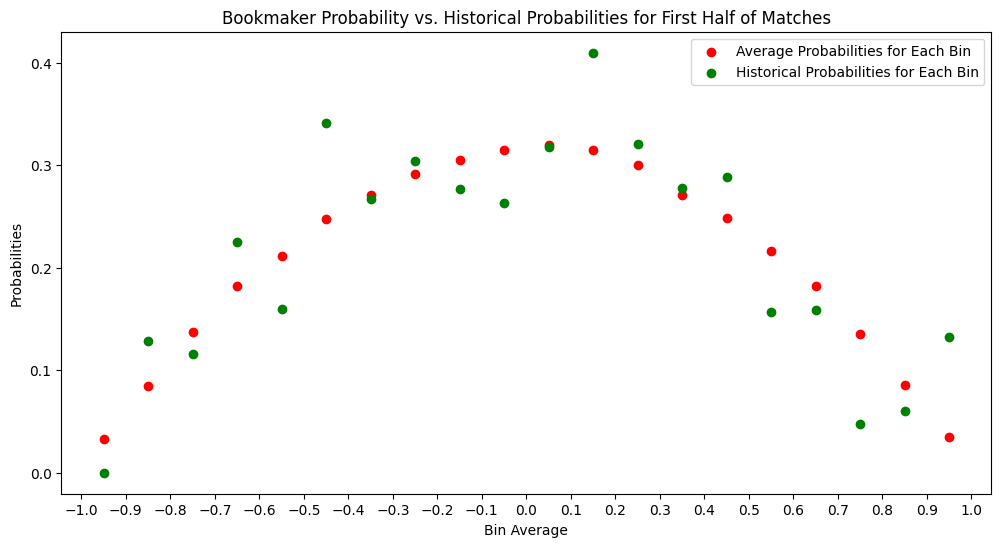

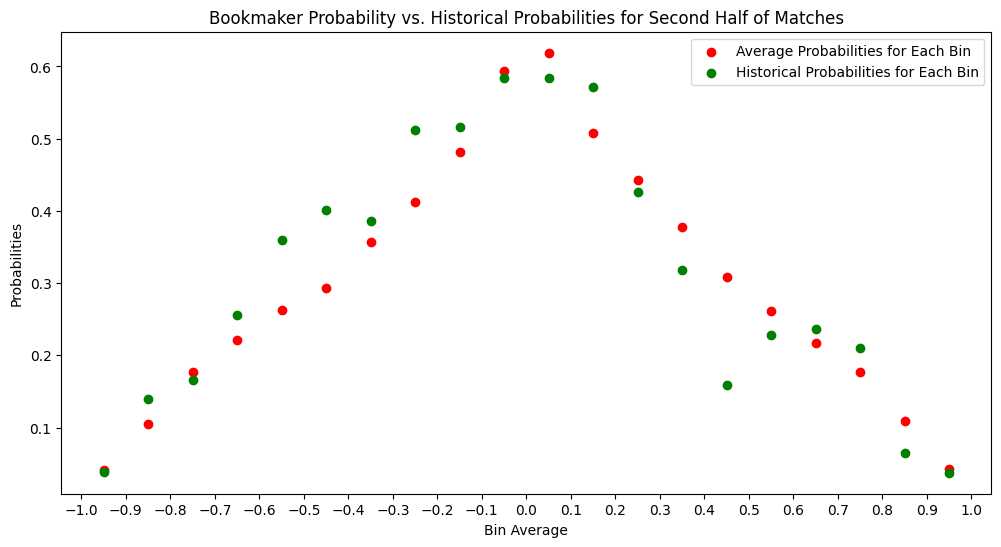

In [47]:
task2_df = task1(filtered_match_data)
plotdf_task_2_1st, plotdf_task_2_2nd = bins_function(task2_df)
plot(plotdf_task_2_1st, 'First')
plot(plotdf_task_2_2nd, 'Second')


When we exclude the matches where red cards are shown, the results we get do not differ much. If a red card is shown in the early minutes, the bettors immediately revise the odds, but if a red card is shown in the late minutes, the result of the match does not change much. The reason why the cards drawn in the early minutes do not affect our results is that the odds in the remaining minutes are more accurate and therefore have a higher weight when analyzing the data.

## TASK-3

Firstly, the features will be used for decision tree model are determined.

In [48]:
[x for x in match_data.columns]

['fixture_id',
 'halftime',
 'current_time',
 'half_start_datetime',
 'match_start_datetime',
 'minute',
 'second',
 'latest_bookmaker_update',
 'suspended',
 'stopped',
 '1',
 '2',
 'X',
 'name',
 'ticking',
 'Accurate Crosses - away',
 'Accurate Crosses - home',
 'Assists - away',
 'Assists - home',
 'Attacks - away',
 'Attacks - home',
 'Ball Possession % - away',
 'Ball Possession % - home',
 'Ball Safe - away',
 'Ball Safe - home',
 'Challenges - away',
 'Challenges - home',
 'Corners - away',
 'Corners - home',
 'Counter Attacks - away',
 'Counter Attacks - home',
 'Dangerous Attacks - away',
 'Dangerous Attacks - home',
 'Dribble Attempts - away',
 'Dribble Attempts - home',
 'Fouls - away',
 'Fouls - home',
 'Free Kicks - away',
 'Free Kicks - home',
 'Goal Attempts - away',
 'Goal Attempts - home',
 'Goal Kicks - away',
 'Goal Kicks - home',
 'Goals - away',
 'Goals - home',
 'Headers - away',
 'Headers - home',
 'Hit Woodwork - away',
 'Hit Woodwork - home',
 'Injuries - away

fixture_id, current_time, half_start_datetime, match_start_datetime, latest_bookmaker_update, suspended, stopped, name, ticking, finalscore,  'Score Change - away',
 'Score Change - home',

In [49]:
tree_match_data = match_data.drop(['fixture_id', 'current_time', 'half_start_datetime', 'match_start_datetime', 'latest_bookmaker_update', 'suspended', 'stopped', '1', '2', 'X', 'name', 'ticking', 'final_score'], axis=1)
tree_match_data = tree_match_data.fillna(0)
tree_match_data


,halftime,minute,second,Accurate Crosses - away,Accurate Crosses - home,Assists - away,Assists - home,Attacks - away,Attacks - home,Ball Possession % - away,...,Throwins - away,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home,current_state,result
0,1st-half,9,59,0.0,0.0,0.0,0.0,2.0,18.0,28.0,...,3.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,X,1
1,1st-half,25,53,0.0,1.0,0.0,0.0,12.0,40.0,24.0,...,6.0,11.0,1.0,12.0,0.0,0.0,0.0,0.0,X,1
2,1st-half,26,48,0.0,1.0,0.0,0.0,12.0,40.0,21.0,...,6.0,11.0,1.0,13.0,0.0,0.0,0.0,0.0,X,1
3,1st-half,27,55,0.0,1.0,0.0,0.0,12.0,42.0,22.0,...,6.0,11.0,1.0,13.0,0.0,0.0,0.0,0.0,X,1
4,1st-half,32,41,0.0,1.0,0.0,0.0,15.0,46.0,21.0,...,7.0,11.0,1.0,14.0,0.0,0.0,0.0,0.0,X,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55838,2nd-half,44,42,4.0,3.0,0.0,1.0,107.0,73.0,68.0,...,0.0,0.0,19.0,10.0,1.0,3.0,0.0,0.0,1,1
55839,2nd-half,45,42,4.0,3.0,0.0,1.0,109.0,73.0,68.0,...,0.0,0.0,19.0,10.0,1.0,3.0,0.0,0.0,1,1
55840,2nd-half,46,42,4.0,3.0,0.0,1.0,112.0,73.0,68.0,...,0.0,0.0,19.0,10.0,1.0,3.0,0.0,0.0,1,1
55841,2nd-half,47,42,4.0,3.0,0.0,1.0,118.0,73.0,68.0,...,0.0,0.0,19.0,10.0,1.0,3.0,0.0,0.0,1,1


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [51]:
X = tree_match_data.drop(['result'], axis=1)
Y = tree_match_data['result']


categorical_features = ['current_state', 'Score Change - away', 'Score Change - home', 'halftime']
numerical_features = [col for col in X.columns if col not in categorical_features]

for col in categorical_features:
    X[col] = X[col].astype(str)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Test verisiyle tahmin yap
y_pred = clf.predict(X_test)

# Modelin performansını değerlendir
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.629378837125316


Without bet data, the model has 0.62 accuracy but I think it is very bad accuracy.

In [52]:
second_tree_match_data = task1(match_data)
second_tree_match_data = second_tree_match_data[['halftime', 'minute', 'second', 'normalized_P_home', 'normalized_P_draw', 'normalized_P_away', 'result']]
X_2 = second_tree_match_data.drop(['result'], axis=1)
Y_2 = second_tree_match_data[['result']]

categorical_features = ['halftime']
numerical_features = [col for col in X_2.columns if col not in categorical_features]

for col in categorical_features:
    X_2[col] = X_2[col].astype(str)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_transformed = preprocessor.fit_transform(X_2)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y_2, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Test verisiyle tahmin yap
y_pred = clf.predict(X_test)

# Modelin performansını değerlendir
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6456301914048392


The second decision tree model is created with normalized bet data and its accuracy is also low. I could not make a model to compare implied probabilities by bookmaker and decision tree results but the second decision tree model includes implied probabilites. These results show the implied probabilities by bookmaker are meaningless. 